In [1]:
import os
os.chdir("facemaskdetection")
Dataset='Dataset'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)
print('Total no of images:',len(os.listdir('Dataset/with_mask')) + len(os.listdir('Dataset/without_mask')))
print('No of images with mask:',len(os.listdir('Dataset/with_mask')))
print('No of images without mask:',len(os.listdir('Dataset/without_mask')))

['without_mask', 'with_mask']
Total no of images: 782
No of images with mask: 397
No of images without mask: 385


In [2]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
img_rows, img_cols = 112, 112

images = []
labels = []

for category in Data_Dir:
    folder_path = os.path.join(Dataset, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        img=cv2.imread(img_path)

        try:
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized_img=cv2.resize(grayscale_img,(img_rows, img_cols))
            images.append(resized_img)
            labels.append(category)
        except Exception as e:
            print('Exception:',e)
        
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows, img_cols,1))
#ONE HOT ENCODER
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X, test_X, train_y, test_y) = train_test_split(images, labels, test_size=0.25, random_state=0)
print('No of images in training sample:',len(train_X))
print('No of images in testing sample:', len(test_X))

No of images in training sample: 586
No of images in testing sample: 196


In [3]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D


num_classes = 2
batch_size = 32


model=Sequential()


model.add(Conv2D(64,(3,3),input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))


model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

Epoch 1/50
14/14 [==============================] - 11s 772ms/step - loss: 1.1071 - accuracy: 0.5125 - val_loss: 0.7021 - val_accuracy: 0.4694
Epoch 2/50
14/14 [==============================] - 11s 763ms/step - loss: 0.6763 - accuracy: 0.5558 - val_loss: 0.6372 - val_accuracy: 0.6463
Epoch 3/50
14/14 [==============================] - 12s 827ms/step - loss: 0.6341 - accuracy: 0.6196 - val_loss: 0.6600 - val_accuracy: 0.5102
Epoch 4/50
14/14 [==============================] - 12s 870ms/step - loss: 0.5586 - accuracy: 0.6879 - val_loss: 0.4617 - val_accuracy: 0.8231
Epoch 5/50
14/14 [==============================] - 12s 847ms/step - loss: 0.4736 - accuracy: 0.7813 - val_loss: 0.4920 - val_accuracy: 0.7415
Epoch 6/50
14/14 [==============================] - 12s 843ms/step - loss: 0.4131 - accuracy: 0.8200 - val_loss: 0.4204 - val_accuracy: 0.8435
Epoch 7/50
14/14 [==============================] - 11s 804ms/step - loss: 0.3288 - accuracy: 0.8724 - val_loss: 0.3359 - val_accuracy: 0.8639

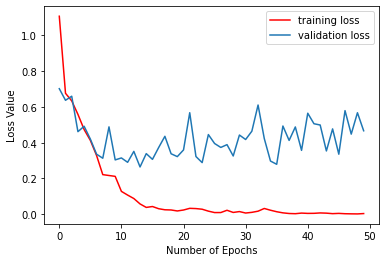

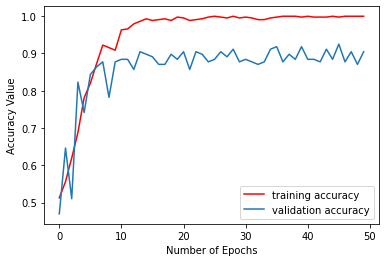

In [4]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='face_mask_detection_architecture.png')

from keras.optimizers import Adam

epochs = 50

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

fitted_model = model.fit(
    train_X,
    train_y,
    epochs = epochs,
    validation_split=0.25)


from matplotlib import pyplot as plt

plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [5]:
model.save('facemaskpredictor.h5')